<a href="https://colab.research.google.com/github/Katie0731/stats_DL/blob/main/chapter08_intro-to-dl-for-computer-vision%200519%20%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Introduction to deep learning for computer vision

## Introduction to convnets

**Instantiating a small convnet**

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

**Displaying the model's summary**

In [2]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

**Training the convnet on MNIST images**

In [3]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/5
938/938 [==============================] - 15s 4ms/step - loss: 0.1505 - accuracy: 0.9536
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0431 - accuracy: 0.9866
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0300 - accuracy: 0.9908
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0225 - accuracy: 0.9930
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0178 - accuracy: 0.9945


**Evaluating the convnet**

In [4]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0250 - accuracy: 0.9921
Test accuracy: 0.992


### The convolution operation

#### Understanding border effects and padding

#### Understanding convolution strides

### The max-pooling operation

**An incorrectly structured convnet missing its max-pooling layers**

In [5]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [6]:
model_no_max_pool.summary() #값이 너무 커요...

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 flatten_1 (Flatten)         (None, 61952)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                619530    
                                                                 
Total params: 712,202
Trainable params: 712,202
Non-trainab

In [10]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, strides=2, activation="relu")(inputs) ####
x = layers.Conv2D(filters=64, kernel_size=3, strides=2, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, strides=2, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [11]:
model_no_max_pool.summary() #stride 늘리는 걸로 down sample 할 수 있어 그래도 usually max-pooling이 더 나아

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 32)        320       
                                                                 
 conv2d_10 (Conv2D)          (None, 6, 6, 64)          18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 2, 2, 128)         73856     
                                                                 
 flatten_3 (Flatten)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 97,802
Trainable params: 97,802
Non-trainable

In [ ]:
# average pooling 쓰일 때도 있지만, max-pooling이 제일 효과적임

## Training a convnet from scratch on a small dataset

### The relevance of deep learning for small-data problems

### Downloading the data

In [12]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gaurdyou","key":"65b4fed121c42003bb7a2d1b0466d46f"}'}

In [19]:
import os
os.listdir()

['.config', 'kaggle.json', 'dogs-vs-cats.zip', 'sample_data']

In [16]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [18]:
!kaggle competitions download -c dogs-vs-cats

 99% 802M/812M [00:04<00:00, 149MB/s]
100% 812M/812M [00:04<00:00, 180MB/s]


In [20]:
!unzip -qq dogs-vs-cats

In [21]:
os.listdir()

['.config',
 'kaggle.json',
 'train.zip',
 'dogs-vs-cats.zip',
 'sampleSubmission.csv',
 'test1.zip',
 'sample_data']

In [22]:
!unzip -qq train.zip

In [23]:
os.listdir()

['.config',
 'kaggle.json',
 'train.zip',
 'dogs-vs-cats.zip',
 'sampleSubmission.csv',
 'train',
 'test1.zip',
 'sample_data']

In [25]:
os.listdir('train')

['cat.3987.jpg',
 'cat.1798.jpg',
 'dog.8687.jpg',
 'cat.1691.jpg',
 'dog.11634.jpg',
 'cat.11923.jpg',
 'cat.97.jpg',
 'cat.10241.jpg',
 'dog.4203.jpg',
 'dog.8128.jpg',
 'dog.9145.jpg',
 'cat.291.jpg',
 'dog.11786.jpg',
 'cat.11362.jpg',
 'cat.3675.jpg',
 'cat.8241.jpg',
 'cat.12076.jpg',
 'cat.7087.jpg',
 'cat.9176.jpg',
 'cat.5116.jpg',
 'cat.7189.jpg',
 'cat.8784.jpg',
 'cat.7293.jpg',
 'dog.2589.jpg',
 'cat.4939.jpg',
 'dog.6048.jpg',
 'dog.8495.jpg',
 'dog.7160.jpg',
 'cat.1291.jpg',
 'dog.6380.jpg',
 'dog.3117.jpg',
 'dog.11524.jpg',
 'cat.5917.jpg',
 'cat.7725.jpg',
 'cat.1828.jpg',
 'dog.6116.jpg',
 'dog.7531.jpg',
 'cat.3595.jpg',
 'dog.8566.jpg',
 'cat.763.jpg',
 'dog.4219.jpg',
 'cat.12348.jpg',
 'cat.8938.jpg',
 'dog.8162.jpg',
 'cat.5706.jpg',
 'cat.2108.jpg',
 'cat.9372.jpg',
 'dog.11539.jpg',
 'cat.10495.jpg',
 'dog.9560.jpg',
 'cat.2379.jpg',
 'cat.8331.jpg',
 'dog.7552.jpg',
 'cat.6317.jpg',
 'dog.11554.jpg',
 'cat.4877.jpg',
 'cat.8145.jpg',
 'cat.11417.jpg',
 'dog.

**Copying images to training, validation, and test directories**

In [27]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

# 작은 subset에서 할거라 이거 쓴거임
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [30]:
dir = new_base_dir / 'test' / 'cat'

In [31]:
dir

PosixPath('cats_vs_dogs_small/test/cat')

In [33]:
fnames_ex = [f"{'dog'}.{i}.jpg" for i in range(0, 1000)]

In [34]:
fnames_ex

['dog.0.jpg',
 'dog.1.jpg',
 'dog.2.jpg',
 'dog.3.jpg',
 'dog.4.jpg',
 'dog.5.jpg',
 'dog.6.jpg',
 'dog.7.jpg',
 'dog.8.jpg',
 'dog.9.jpg',
 'dog.10.jpg',
 'dog.11.jpg',
 'dog.12.jpg',
 'dog.13.jpg',
 'dog.14.jpg',
 'dog.15.jpg',
 'dog.16.jpg',
 'dog.17.jpg',
 'dog.18.jpg',
 'dog.19.jpg',
 'dog.20.jpg',
 'dog.21.jpg',
 'dog.22.jpg',
 'dog.23.jpg',
 'dog.24.jpg',
 'dog.25.jpg',
 'dog.26.jpg',
 'dog.27.jpg',
 'dog.28.jpg',
 'dog.29.jpg',
 'dog.30.jpg',
 'dog.31.jpg',
 'dog.32.jpg',
 'dog.33.jpg',
 'dog.34.jpg',
 'dog.35.jpg',
 'dog.36.jpg',
 'dog.37.jpg',
 'dog.38.jpg',
 'dog.39.jpg',
 'dog.40.jpg',
 'dog.41.jpg',
 'dog.42.jpg',
 'dog.43.jpg',
 'dog.44.jpg',
 'dog.45.jpg',
 'dog.46.jpg',
 'dog.47.jpg',
 'dog.48.jpg',
 'dog.49.jpg',
 'dog.50.jpg',
 'dog.51.jpg',
 'dog.52.jpg',
 'dog.53.jpg',
 'dog.54.jpg',
 'dog.55.jpg',
 'dog.56.jpg',
 'dog.57.jpg',
 'dog.58.jpg',
 'dog.59.jpg',
 'dog.60.jpg',
 'dog.61.jpg',
 'dog.62.jpg',
 'dog.63.jpg',
 'dog.64.jpg',
 'dog.65.jpg',
 'dog.66.jpg',
 'dog

In [28]:
os.listdir('cats_vs_dogs_small/test')

['dog', 'cat']

In [29]:
os.listdir('cats_vs_dogs_small/test/dog')

['dog.1816.jpg',
 'dog.2405.jpg',
 'dog.2316.jpg',
 'dog.1884.jpg',
 'dog.2245.jpg',
 'dog.1583.jpg',
 'dog.2466.jpg',
 'dog.2130.jpg',
 'dog.1843.jpg',
 'dog.1889.jpg',
 'dog.1591.jpg',
 'dog.1822.jpg',
 'dog.1557.jpg',
 'dog.2265.jpg',
 'dog.2227.jpg',
 'dog.2486.jpg',
 'dog.2155.jpg',
 'dog.1736.jpg',
 'dog.2271.jpg',
 'dog.1619.jpg',
 'dog.2025.jpg',
 'dog.1756.jpg',
 'dog.1674.jpg',
 'dog.2262.jpg',
 'dog.2396.jpg',
 'dog.2441.jpg',
 'dog.2263.jpg',
 'dog.2242.jpg',
 'dog.2480.jpg',
 'dog.1536.jpg',
 'dog.2153.jpg',
 'dog.2468.jpg',
 'dog.2183.jpg',
 'dog.1524.jpg',
 'dog.2487.jpg',
 'dog.2070.jpg',
 'dog.1941.jpg',
 'dog.1630.jpg',
 'dog.1542.jpg',
 'dog.2354.jpg',
 'dog.1879.jpg',
 'dog.1507.jpg',
 'dog.2200.jpg',
 'dog.1578.jpg',
 'dog.1798.jpg',
 'dog.2339.jpg',
 'dog.1623.jpg',
 'dog.1650.jpg',
 'dog.1957.jpg',
 'dog.2179.jpg',
 'dog.2435.jpg',
 'dog.1839.jpg',
 'dog.1999.jpg',
 'dog.1835.jpg',
 'dog.2055.jpg',
 'dog.2231.jpg',
 'dog.2142.jpg',
 'dog.2314.jpg',
 'dog.1615.jpg

### Building the model

**Instantiating a small convnet for dogs vs. cats classification**

In [35]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [37]:
model.summary() #height & width는 줄이고, depth는 늘리고 (height, width, depth)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

**Configuring the model for training**

In [38]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

### Data preprocessing

**Using `image_dataset_from_directory` to read images**

In [39]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [40]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [41]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [42]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [45]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


In [44]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4))).batch(32) ###
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 4, 4)
(32, 4, 4)
(32, 4, 4)


**Displaying the shapes of the data and labels yielded by the `Dataset`**

In [46]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Fitting the model using a `Dataset`**

In [47]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 7s 78ms/step - loss: 0.7245 - accuracy: 0.5160 - val_loss: 0.7290 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 4s 67ms/step - loss: 0.7024 - accuracy: 0.5560 - val_loss: 0.6746 - val_accuracy: 0.5490
Epoch 3/30
63/63 [==============================] - 4s 67ms/step - loss: 0.6689 - accuracy: 0.6190 - val_loss: 0.6183 - val_accuracy: 0.6400
Epoch 4/30
63/63 [==============================] - 4s 66ms/step - loss: 0.6208 - accuracy: 0.6655 - val_loss: 0.6191 - val_accuracy: 0.6320
Epoch 5/30
63/63 [==============================] - 4s 66ms/step - loss: 0.5964 - accuracy: 0.6745 - val_loss: 0.6190 - val_accuracy: 0.6830
Epoch 6/30
63/63 [==============================] - 4s 66ms/step - loss: 0.5569 - accuracy: 0.7130 - val_loss: 0.6808 - val_accuracy: 0.6070
Epoch 7/30
63/63 [==============================] - 4s 66ms/step - loss: 0.5193 - accuracy: 0.7390 - val_loss: 0.5644 - val_accuracy: 0.7050
Epoch 8/30
63

**Displaying curves of loss and accuracy during training**

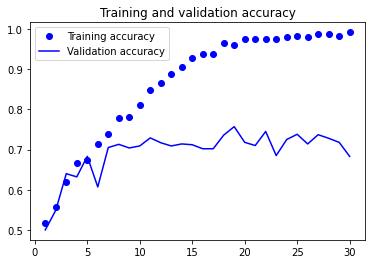

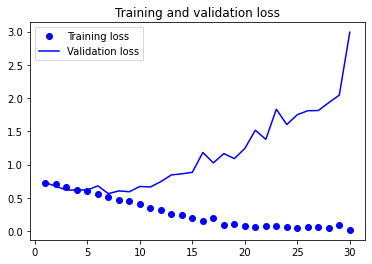

In [48]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [49]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

# accuracy가 그리 좋아보이진 않음. overfit
# 해결 위해 data augmentation ㄱㄱ

63/63 [==============================] - 3s 35ms/step - loss: 0.5756 - accuracy: 0.7090
Test accuracy: 0.709


### Using data augmentation

**Define a data augmentation stage to add to an image model**

In [50]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

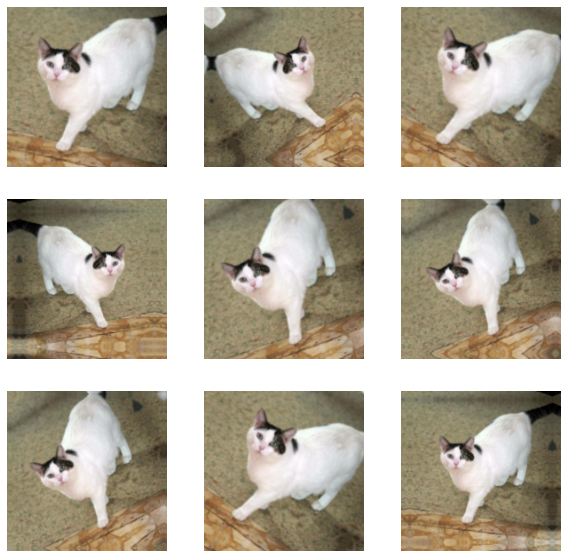

In [51]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [52]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)    #####
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)    #####
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [53]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 7s 84ms/step - loss: 0.7229 - accuracy: 0.4965 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 2/100
63/63 [==============================] - 5s 77ms/step - loss: 0.7108 - accuracy: 0.5115 - val_loss: 0.6924 - val_accuracy: 0.5060
Epoch 3/100
63/63 [==============================] - 5s 69ms/step - loss: 0.6947 - accuracy: 0.5345 - val_loss: 0.6681 - val_accuracy: 0.5710
Epoch 4/100
63/63 [==============================] - 5s 68ms/step - loss: 0.7189 - accuracy: 0.6185 - val_loss: 0.6853 - val_accuracy: 0.5990
Epoch 5/100
63/63 [==============================] - 7s 109ms/step - loss: 0.6583 - accuracy: 0.6260 - val_loss: 0.6151 - val_accuracy: 0.6360
Epoch 6/100
63/63 [==============================] - 7s 106ms/step - loss: 0.6293 - accuracy: 0.6465 - val_loss: 0.6337 - val_accuracy: 0.6400
Epoch 7/100
63/63 [==============================] - 5s 68ms/step - loss: 0.6281 - accuracy: 0.6620 - val_loss: 0.6166 - val_accuracy: 0.6340
Epoc

**Evaluating the model on the test set**

In [54]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

#아까보단 결과값이 훨씬 좋음 (0.709 -> 0.824)

63/63 [==============================] - 3s 38ms/step - loss: 0.4421 - accuracy: 0.8240
Test accuracy: 0.824


## Leveraging a pretrained model

### Feature extraction with a pretrained model

**Instantiating the VGG16 convolutional base**

In [55]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False, # conv_base만 가져올거야. classifier은 복사 안해옴
    input_shape=(180, 180, 3))

58900480/58889256 [==============================] - 1s 0us/step


In [56]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

#### Fast feature extraction without data augmentation

**Extracting the VGG16 features and corresponding labels**

In [57]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

In [58]:
train_features.shape # 1000 dogs, 1000 cats

(2000, 5, 5, 512)

**Defining and training the densely connected classifier**

In [59]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

# 와 layer 적으니까 겁나 빨리 됨

Epoch 1/20
63/63 [==============================] - 1s 10ms/step - loss: 12.2328 - accuracy: 0.9285 - val_loss: 6.8491 - val_accuracy: 0.9490
Epoch 2/20
63/63 [==============================] - 0s 7ms/step - loss: 3.4417 - accuracy: 0.9750 - val_loss: 4.2896 - val_accuracy: 0.9680
Epoch 3/20
63/63 [==============================] - 0s 6ms/step - loss: 2.8303 - accuracy: 0.9805 - val_loss: 4.8116 - val_accuracy: 0.9690
Epoch 4/20
63/63 [==============================] - 0s 7ms/step - loss: 1.7765 - accuracy: 0.9890 - val_loss: 4.4555 - val_accuracy: 0.9720
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 0.6652 - accuracy: 0.9955 - val_loss: 10.5574 - val_accuracy: 0.9590
Epoch 6/20
63/63 [==============================] - 0s 6ms/step - loss: 1.4612 - accuracy: 0.9900 - val_loss: 5.3026 - val_accuracy: 0.9710
Epoch 7/20
63/63 [==============================] - 0s 7ms/step - loss: 0.8089 - accuracy: 0.9945 - val_loss: 8.7245 - val_accuracy: 0.9590
Epoch 8/20
63/63 

**Plotting the results**

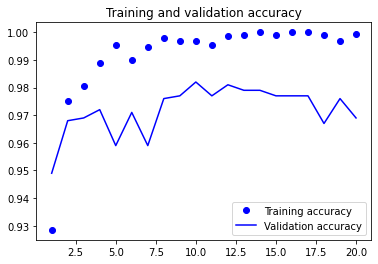

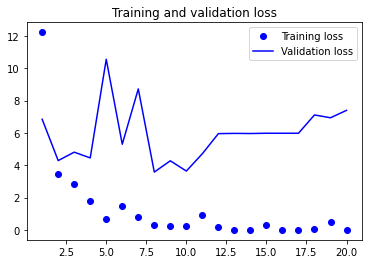

In [60]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#자료가 2000개 뿐인데도 accuracy가 꽤 괜찮음

#### Feature extraction together with data augmentation

**Instantiating and freezing the VGG16 convolutional base**

In [62]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False  #conv_base 파트를 train하지 않음

**Printing the list of trainable weights before and after freezing**

In [63]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [64]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

In [65]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [66]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 12s 173ms/step - loss: 19.6008 - accuracy: 0.8915 - val_loss: 4.7996 - val_accuracy: 0.9690
Epoch 2/50
63/63 [==============================] - 11s 170ms/step - loss: 8.7681 - accuracy: 0.9395 - val_loss: 6.2477 - val_accuracy: 0.9610
Epoch 3/50
63/63 [==============================] - 11s 174ms/step - loss: 5.7993 - accuracy: 0.9580 - val_loss: 4.7190 - val_accuracy: 0.9750
Epoch 4/50
63/63 [==============================] - 11s 170ms/step - loss: 5.6013 - accuracy: 0.9545 - val_loss: 8.9014 - val_accuracy: 0.9590
Epoch 5/50
63/63 [==============================] - 11s 174ms/step - loss: 4.6617 - accuracy: 0.9610 - val_loss: 4.3517 - val_accuracy: 0.9720
Epoch 6/50
63/63 [==============================] - 11s 171ms/step - loss: 3.6118 - accuracy: 0.9700 - val_loss: 7.8803 - val_accuracy: 0.9590
Epoch 7/50
63/63 [==============================] - 11s 171ms/step - loss: 3.0609 - accuracy: 0.9705 - val_loss: 5.2139 - val_accuracy: 0.969

**Evaluating the model on the test set**

In [67]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

# accuracy good! (0.8XX -> 0.975)

63/63 [==============================] - 7s 107ms/step - loss: 2.8821 - accuracy: 0.9750
Test accuracy: 0.975


### Fine-tuning a pretrained model

In [68]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

**Freezing all layers until the fourth from the last**

In [69]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [70]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

**Fine-tuning the model**

In [71]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),  ## 디폴트보다 작은 값 설정
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 14s 190ms/step - loss: 0.4112 - accuracy: 0.9910 - val_loss: 1.4693 - val_accuracy: 0.9860
Epoch 2/30
63/63 [==============================] - 12s 184ms/step - loss: 0.3850 - accuracy: 0.9890 - val_loss: 1.8440 - val_accuracy: 0.9780
Epoch 3/30
63/63 [==============================] - 12s 185ms/step - loss: 0.6932 - accuracy: 0.9855 - val_loss: 1.8910 - val_accuracy: 0.9780
Epoch 4/30
63/63 [==============================] - 12s 186ms/step - loss: 0.2618 - accuracy: 0.9925 - val_loss: 2.0689 - val_accuracy: 0.9770
Epoch 5/30
63/63 [==============================] - 12s 186ms/step - loss: 0.3640 - accuracy: 0.9920 - val_loss: 2.0151 - val_accuracy: 0.9800
Epoch 6/30
63/63 [==============================] - 12s 192ms/step - loss: 0.1894 - accuracy: 0.9950 - val_loss: 2.4735 - val_accuracy: 0.9730
Epoch 7/30
63/63 [==============================] - 12s 188ms/step - loss: 0.2381 - accuracy: 0.9940 - val_loss: 1.8453 - val_accuracy: 0.9810

In [72]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

# 다 동결시켰을 때보다 accuracy 좋은 경우도 있고~ 안 좋은 경우도 있고~

63/63 [==============================] - 7s 111ms/step - loss: 2.0139 - accuracy: 0.9775
Test accuracy: 0.978


## Summary